In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dat = pd.read_csv('../data/interim/rain_interim.csv')

In [52]:
# check for missingness
dat.isnull().mean()

level_0      0.000000
index        0.000000
date         0.000000
station      0.000000
county       0.000000
longitude    0.000000
latitude     0.000000
rain         0.000177
temp         0.006181
wetb         0.009280
dewpt        0.009031
vappr        0.019467
rhum         0.018303
msl          0.015283
wdsp         0.046288
wddir        0.047685
ww           0.558961
w            0.558961
sun          0.553751
vis          0.560646
clht         0.553761
clamt        0.553761
rain_flag    0.000000
seq          0.000000
oid          0.000000
datetime     0.000000
month        0.000000
dtype: float64

In [3]:
dat.columns

Index(['level_0', 'index', 'date', 'station', 'county', 'longitude',
       'latitude', 'rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl',
       'wdsp', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain_flag',
       'seq', 'oid'],
      dtype='object')

In [4]:
dat.station.unique()

array(['Cork_Airport', 'Moore_Park', 'Roches_Point', 'SherkinIsland',
       'Valentia_Observatory', 'Gurteen', 'Shannon_Airport',
       'JohnstownII', 'Oak_Park', 'Casement', 'Dublin_Airport',
       'PhoenixPark', 'Dunsany', 'Mullingar', 'Athenry', 'Mace_Head',
       'Mt_Dillon', 'Belmullet', 'Claremorris', 'Knock_Airport',
       'Newport', 'Markree', 'Ballyhaise', 'Finner', 'Malin_head'],
      dtype=object)

In [5]:
dat[['rain_flag', 'seq']].describe().round(1)

,rain_flag,seq
count,3633608.0,3633608.0
mean,0.1,581.0
std,0.3,4759.2
min,0.0,1.0
25%,0.0,4.0
50%,0.0,14.0
75%,0.0,42.0
max,1.0,63041.0


In [6]:
dat[['seq', 'oid']].groupby('oid').max().describe()

,seq
count,21318.000000
mean,64.931279
std,436.657919
min,2.000000
25%,18.000000
50%,40.000000
75%,80.000000
max,63041.000000


In [7]:
# check the top end of the tail.  is that 63041 (7.2 years) drought an outlier?
dat[['seq', 'oid', 'station']].groupby('oid').max().query('seq < 63041.0').describe()

,seq
count,21317.000000
mean,61.977014
std,67.923682
min,2.000000
25%,18.000000
50%,40.000000
75%,80.000000
max,621.000000


In [8]:
# identify the outlier
dat.query('seq == 63041')[['station', 'oid']]

,station,oid
478152,Roches_Point,4277


In [9]:
# drop the outlier
dat = dat.query('station != "Roches_point" & oid != 4277')

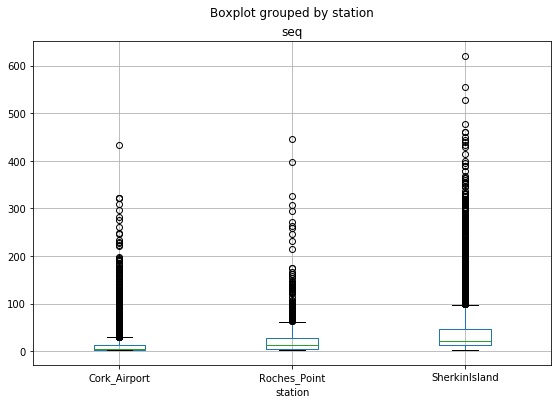

In [10]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
dat\
    .query("station in ['Cork_Airport', 'Moore_Park', 'Roches_Point', 'SherkinIsland']")\
    .loc[:, ['station', 'seq', 'oid']]\
    .groupby('oid')\
    .max()\
    .boxplot('seq', 'station', ax=ax)

In [11]:
# Explore differences by station and by month of the year
# dat['month'] = pd.DatetimeIndex(dat.date).month()
dat['datetime'] = dat.date.to_numpy(np.datetime64)
dat['month'] = pd.DatetimeIndex(dat.datetime).month
pd.pivot_table(dat, values='seq', index='station', columns='month', aggfunc=np.mean)

month,1,2,3,4,5,6,7,8,9,10,11,12
station,,,,,,,,,,,,
Athenry,14.988095,30.681426,51.296715,47.291331,36.118464,48.063139,35.627736,17.191891,25.179788,18.927562,24.631012,24.113793
Ballyhaise,33.080059,30.445522,34.927183,44.308153,37.733466,44.747979,35.242826,16.512927,22.607721,20.030814,19.857072,24.701697
Belmullet,21.365236,22.109320,29.757863,31.655358,37.938023,35.889536,24.959683,21.362302,32.135834,21.842002,16.962963,28.110733
Casement,35.417540,36.730906,48.641430,54.346851,52.151373,60.273321,47.982762,35.628020,54.484743,36.822075,31.826697,40.763878
Claremorris,27.451425,32.133581,35.187199,39.690002,40.547253,43.643391,34.008373,22.659716,37.336449,20.978877,19.356126,36.509707
Cork_Airport,29.049274,30.969816,37.724992,54.638538,50.173199,59.770397,43.792454,35.465499,39.798135,30.457234,23.808000,31.572750
Dublin_Airport,33.552053,38.014122,45.127707,49.163113,51.257954,61.667476,44.708761,33.166948,40.069622,31.664342,27.906942,32.945530
Dunsany,21.764944,37.531410,50.534149,48.648783,32.143575,45.727286,38.590742,21.542841,31.309990,23.945460,22.999205,23.257684
Finner,16.886422,28.247449,42.095416,38.288045,35.470996,35.097665,36.719207,15.623561,20.814154,18.146719,12.618642,14.473111


Proposed method of censoring:

- randomly select 50% of oids per station for censoring
- for each, limit the duration of the observation to between 10% and 90% of the complete observation

In [12]:
rules = dat\
    .loc[:, ['station', 'oid', 'seq']]\
    .groupby(['station', 'oid'])\
    .max()\
    .sample(frac=0.5)\
    .reset_index()\
    .copy()
rules

,station,oid,seq
0,Dublin_Airport,4795,2
1,Dunsany,3617,3
2,Moore_Park,3329,2
3,SherkinIsland,425,3
4,Cork_Airport,9568,3
...,...,...,...
136921,Valentia_Observatory,15552,2
136922,Mullingar,5230,3
136923,Casement,8905,2
136924,Shannon_Airport,3247,3


In [13]:
rules.shape[0]

136926

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7546fb3b38>]],
      dtype=object)

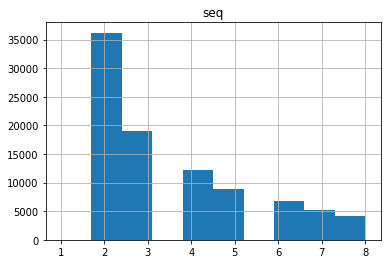

In [14]:
rules.query("seq < 9").hist('seq')

In [15]:
rules['keep'] = (np.random.random(rules.shape[0]) * rules.seq).round(0)
rules.loc[rules.keep == 0.0, 'keep'] = 1.0 # because 0 would effectively delete the observation
rules

,station,oid,seq,keep
0,Dublin_Airport,4795,2,1.0
1,Dunsany,3617,3,1.0
2,Moore_Park,3329,2,1.0
3,SherkinIsland,425,3,1.0
4,Cork_Airport,9568,3,1.0
...,...,...,...,...
136921,Valentia_Observatory,15552,2,1.0
136922,Mullingar,5230,3,1.0
136923,Casement,8905,2,1.0
136924,Shannon_Airport,3247,3,1.0


In [16]:
for idx, row in rules.iloc[10:12].iterrows():
    print(row.station, ', ', row.oid, ', ', row.keep)
    # dat = dat.query("station == row.station & oid == row.oid & seq <= row.keep")

Dublin_Airport ,  76 ,  4.0
Valentia_Observatory ,  1908 ,  1.0


In [29]:
dat.query("oid == 76")

,level_0,index,date,station,county,longitude,latitude,rain,temp,wetb,...,w,sun,vis,clht,clamt,rain_flag,seq,oid,datetime,month
981,1008,1169,1989-02-18 17:00:00,Cork_Airport,Cork,-8.485,51.842,0.0,11.6,10.6,...,82.0,0.0,12000.0,11.0,8.0,0,1,76,1989-02-18 17:00:00,2
982,1009,1170,1989-02-18 18:00:00,Cork_Airport,Cork,-8.485,51.842,0.2,9.4,8.8,...,86.0,0.0,15000.0,16.0,8.0,1,2,76,1989-02-18 18:00:00,2
225773,1412,256532,2003-11-05 21:00:00,Moore_Park,Cork,-8.258,52.158,0.0,14.2,12.6,...,NaN,NaN,NaN,NaN,NaN,0,1,76,2003-11-05 21:00:00,11
225774,1413,256533,2003-11-05 22:00:00,Moore_Park,Cork,-8.258,52.158,0.0,11.6,10.0,...,NaN,NaN,NaN,NaN,NaN,0,2,76,2003-11-05 22:00:00,11
225775,1414,256534,2003-11-05 23:00:00,Moore_Park,Cork,-8.258,52.158,0.0,11.4,9.8,...,NaN,NaN,NaN,NaN,NaN,0,3,76,2003-11-05 23:00:00,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349871,1264,3811050,2000-03-31 23:00:00,Finner,Donegal,-8.239,54.490,0.0,6.5,5.9,...,NaN,NaN,NaN,NaN,NaN,0,124,76,2000-03-31 23:00:00,3
3349872,1265,3811051,2000-04-01 00:00:00,Finner,Donegal,-8.239,54.490,0.2,6.3,5.6,...,NaN,NaN,NaN,NaN,NaN,1,125,76,2000-04-01 00:00:00,4
3410888,735,3964691,1989-02-05 05:00:00,Malin_head,Donegal,-7.339,55.372,0.0,6.2,4.0,...,81.0,0.0,40000.0,999.0,4.0,0,1,76,1989-02-05 05:00:00,2
3410889,736,3964692,1989-02-05 06:00:00,Malin_head,Donegal,-7.339,55.372,0.0,5.7,4.3,...,81.0,0.0,30000.0,30.0,5.0,0,2,76,1989-02-05 06:00:00,2


In [28]:
# for idx, row in rules.iloc[10:12].iterrows():
#     sta = row.station; print(sta)
#     oid = row.oid; print(oid)
#     keep = int(row.keep); print(keep)
#     dat = dat.query("(station != @sta) | (oid != @oid) | (seq <= @keep)")

# dat.loc[dat.station == 'Belmullet', :].join(rules, on=['station', 'oid'], how='left').head()
pd.merge(dat.loc[(dat['oid'] < 10) & (dat['station'] == 'Belmullet'), :], rules,
         how='left', on=['station', 'oid'], suffixes=('', '_y'))\
    .fillna(value={'keep': 10000000})\
    .query('seq <= keep')\
    .drop(['seq_y', 'keep', 'county', 'longitude', 'latitude', 'index', 'date', 'datetime', 'rain'], axis=1)

,level_0,station,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,ww,w,sun,vis,clht,clamt,rain_flag,seq,oid,month
0,62,Belmullet,10.9,9.9,8.9,11.4,87.0,1006.9,22.0,200.0,25.0,82.0,0.0,18000.0,20.0,5.0,0,1,1,1
1,63,Belmullet,11.1,9.8,8.4,11.1,84.0,1006.2,23.0,200.0,80.0,86.0,0.0,18000.0,35.0,7.0,0,2,1,1
2,64,Belmullet,8.6,8.2,7.8,10.5,94.0,1005.8,16.0,200.0,25.0,82.0,0.0,30000.0,37.0,7.0,1,3,1,1
3,65,Belmullet,9.0,8.3,7.6,10.4,90.0,1004.1,18.0,200.0,80.0,22.0,0.0,25000.0,20.0,6.0,0,1,2,1
5,67,Belmullet,8.0,6.9,5.6,9.1,85.0,1003.9,19.0,220.0,25.0,86.0,0.0,26000.0,999.0,1.0,0,1,3,1
6,68,Belmullet,7.8,6.9,5.8,9.2,87.0,1004.0,19.0,230.0,80.0,81.0,0.0,18000.0,20.0,7.0,1,2,3,1
7,69,Belmullet,7.3,6.2,4.8,8.6,84.0,1005.6,12.0,260.0,1.0,81.0,0.0,22000.0,20.0,6.0,0,1,4,1
8,70,Belmullet,7.6,5.9,3.6,7.9,76.0,1007.1,13.0,280.0,2.0,11.0,0.0,28000.0,999.0,3.0,0,2,4,1
9,71,Belmullet,6.0,5.0,3.6,7.9,85.0,1007.9,12.0,290.0,25.0,81.0,0.0,28000.0,20.0,7.0,1,3,4,1
10,72,Belmullet,7.0,4.8,1.5,6.8,68.0,1012.6,19.0,280.0,25.0,82.0,0.0,26000.0,20.0,7.0,0,1,5,1


In [69]:
dat.query("station == 'Belmullet' & oid == 8989")

,level_0,index,date,station,county,longitude,latitude,rain,temp,wetb,...,w,sun,vis,clht,clamt,rain_flag,seq,oid,datetime,month
2585531,96304,2891968,2001-08-20 05:00:00,Belmullet,Mayo,-10.004,54.223,0.0,13.6,11.6,...,11.0,0.0,35000.0,999.0,3.0,0,1,8989,2001-08-20 05:00:00,8
2585532,96305,2891969,2001-08-20 06:00:00,Belmullet,Mayo,-10.004,54.223,0.0,13.9,11.9,...,81.0,0.6,30000.0,999.0,4.0,0,2,8989,2001-08-20 06:00:00,8
2585533,96306,2891970,2001-08-20 07:00:00,Belmullet,Mayo,-10.004,54.223,0.0,14.5,12.3,...,11.0,0.6,30000.0,250.0,6.0,0,3,8989,2001-08-20 07:00:00,8
2585534,96307,2891971,2001-08-20 08:00:00,Belmullet,Mayo,-10.004,54.223,0.0,15.2,13.0,...,11.0,0.5,35000.0,250.0,7.0,0,4,8989,2001-08-20 08:00:00,8
2585535,96308,2891972,2001-08-20 09:00:00,Belmullet,Mayo,-10.004,54.223,0.0,15.2,12.8,...,22.0,0.6,30000.0,40.0,7.0,0,5,8989,2001-08-20 09:00:00,8
2585536,96309,2891973,2001-08-20 10:00:00,Belmullet,Mayo,-10.004,54.223,0.0,16.4,13.8,...,11.0,1.0,30000.0,999.0,4.0,0,6,8989,2001-08-20 10:00:00,8
2585537,96310,2891974,2001-08-20 11:00:00,Belmullet,Mayo,-10.004,54.223,0.0,16.9,14.2,...,11.0,1.0,35000.0,250.0,5.0,0,7,8989,2001-08-20 11:00:00,8


In [54]:
cat_names = ['station', 'month']
[col for col in dat.columns if col not in cat_names + ['oid']]

['level_0',
 'index',
 'date',
 'county',
 'longitude',
 'latitude',
 'rain',
 'temp',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'wdsp',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt',
 'rain_flag',
 'seq',
 'datetime']